# 2019nCoC可视化

In [56]:
import geopandas as gpd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import palettable


basemap_file = "data/basemap/全国省市级地图.shp"
number_file = "data/numbers/confirmed/新冠肺炎各省市病例数据2020-01-30.csv"
bound_file = "data/basemap/bou2_4l.shp"
shengjie_file = "data/basemap/省界.shp"

sp_regions = ["北京", "重庆", "天津", "上海", "香港", "澳门", "台湾"]

def process_sheng(sheng):
    if not sheng or type(sheng) != type(""): return ""
    if sheng == "新疆维吾尔自治区": return "新疆"
    if sheng == "西藏自治区": return "西藏"
    if sheng == "广西壮族自治区": return "广西"
    if sheng == "内蒙古自治区": return "内蒙古"
    if sheng == "宁夏回族自治区": return "宁夏"
    
    if sheng.endswith("省") or sheng.endswith("市"): return sheng[:-1]
    
    return sheng

def process_shi(shi):
    if not shi or type(shi) != type(""): return ""
        
    if shi.endswith("省"):
        shi = shi[:-1]
    
    for region in sp_regions:
        if shi.startswith(region):
            return region
    return shi

def max_match(numbers, basemap):
    sheng_miss_on_map = set(numbers["省"])-set(basemap["省"])
    shi_miss_on_map = set(zip(numbers["省"], numbers["市"])) - set(zip(basemap["省"], basemap["市"]))
#     print("底图上没有的市：", list(filter(lambda p: p[0] not in resheng 
#                                   and not p[1].endswith("区") and not p[1].endswith("县")
#                                   and not p[1].endswith("不详") and not p[1].startswith("外地")
#                                   , reshi)))
    shi_miss_on_numbers = set(set(zip(basemap["省"], basemap["市"])) - set(zip(numbers["省"], numbers["市"])))
    #print("数据中没有的市：", deshi)
    for _, short_shi in shi_miss_on_map:
        for _, long_shi in shi_miss_on_numbers:
            ss_shi = short_shi.replace("州","").replace("市","").replace("县","")
            if long_shi.startswith(ss_shi):
                numbers["市"] = numbers["市"].apply(lambda l: long_shi if l==short_shi else l)

In [57]:
basemap = gpd.read_file(basemap_file)
basemap.crs = 'epsg:4326'
basemap = basemap.to_crs('epsg:3415')
basemap["省"] = basemap["PROVINCENA"].apply(process_sheng)
basemap["市"] = basemap["NAME"].apply(process_shi)

print(set(basemap["省"]))
# basemap.plot()

{'河北', '', '山西', '广东', '湖北', '河南', '广西', '甘肃', '浙江', '新疆', '江西', '辽宁', '黑龙江', '澳门', '香港', '台湾', '云南', '陕西', '内蒙古', '湖南', '宁夏', '山东', '四川', '江苏', '西藏', '海南', '重庆', '吉林', '福建', '青海', '天津', '北京', '上海', '安徽', '贵州'}


In [59]:
def sum_region(df):
    for region in sp_regions:
        
        beijing = df[df["省"] == region]
        df = df[df["省"] != region]
        beijing = beijing.sum()
        beijing["省"] = region
        beijing["市"] = region
        df = df.append(beijing, ignore_index=True)
    return df

numbers = pd.read_csv(number_file, encoding="GBK")
numbers.fillna(0)
numbers["省"] = numbers["省"].apply(process_sheng)
numbers["市"] = numbers["市"].apply(process_shi)
print(numbers.head())
numbers["市"] = numbers["市"].fillna("")
numbers = sum_region(numbers)

max_match(numbers, basemap)


resheng = set(numbers["省"])-set(basemap["省"])
print("底图上没有的省：", resheng)

reshi = set(zip(numbers["省"], numbers["市"])) - set(zip(basemap["省"], basemap["市"]))
print("底图上没有的市：", list(filter(lambda p: p[0] not in resheng 
                              #and not p[1].endswith("区") and not p[1].endswith("县")
                              and not p[1].endswith("不详") and not p[1].startswith("外地")
                              , reshi)))
deshi = set(set(zip(basemap["省"], basemap["市"])) - set(zip(numbers["省"], numbers["市"])))
print("数据中没有的市：", deshi)


print(set(numbers["累计确诊"]))

    省    市  新增确诊  新增康复  新增死亡  累计确诊  累计康复  累计死亡
0  湖北  武汉市   356     7    25  2261    82   129
1  湖北  黄冈市   172     3     7   496     7    12
2  湖北  孝感市   125     0     3   399     0     6
3  湖北  荆门市    49     0     0   191     0     4
4  浙江  温州市    58     4     0   172     7     0
底图上没有的省： {'泰国', '斯里兰卡', '美国', '德国', '芬兰', '日本', '法国', '阿联酋', '马来西亚', '越南', '加拿大', '韩国', '新加坡', '澳大利亚', '印度', '菲律宾', '柬埔寨', '尼泊尔'}
底图上没有的市： [('陕西', '韩城市'), ('宁夏', '宁东'), ('湖南', '湘西自治州'), ('吉林', '公主岭市')]
数据中没有的市： {('新疆', '克拉玛依市'), ('云南', '迪庆州'), ('宁夏', '石嘴山市'), ('青海', '黄南藏族自治州'), ('甘肃', '甘南藏族自治州'), ('甘肃', '嘉峪关市'), ('海南', '文昌市'), ('新疆', '和田地区'), ('辽宁', '鞍山市'), ('贵州', '安顺市'), ('新疆', '阿克苏地区'), ('新疆', '巴音郭楞蒙古自治州'), ('云南', '楚雄市'), ('海南', '定安县'), ('青海', '果洛藏族自治州'), ('安徽', '巢湖市'), ('湖南', '湘西土家族苗族自治州'), ('四川', '阿坝藏族羌族自治州'), ('新疆', '五家渠市'), ('新疆', '克孜勒苏柯尔克孜自治'), ('新疆', '阿拉尔市'), ('吉林', '白城市'), ('内蒙古', '乌兰察布市'), ('海南', '白沙黎族自治县'), ('新疆', '昌吉回族自治州'), ('海南', '屯昌县'), ('吉林', '辽源市'), ('山东', '东营市'), ('西藏', '昌都地区'), ('西藏', '日喀则地

In [60]:
bound = gpd.read_file(bound_file)
bound.crs = 'epsg:4326'
bound = bound.to_crs('epsg:3415')
print(bound.head())

   FNODE_  TNODE_  LPOLY_  RPOLY_  LENGTH  BOU2_4M_  BOU2_4M_ID  GBCODE  \
0       2       7       2       3   7.743         1          23   61030   
1       7      12       2       3   6.426         2          15   61031   
2      12      16       2       3   2.006         3          80   61031   
3      16      21       2       3   2.281         4          99   61030   
4      21      23       2       3   0.587         5          75   61031   

                                            geometry  
0  LINESTRING (1098975.549 4319045.294, 1099763.0...  
1  LINESTRING (1424392.983 4110088.733, 1425718.7...  
2  LINESTRING (1397442.741 3761069.282, 1396722.5...  
3  LINESTRING (1361025.482 3709081.116, 1345452.0...  
4  LINESTRING (1211475.411 3551163.890, 1216681.0...  


/home/irsgis/anaconda3/envs/jupyterlab/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


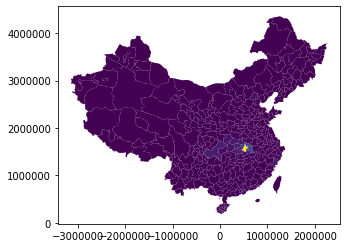

In [62]:

df = basemap.merge(numbers, on=["省", "市"], how="left")
# print(numbers.shape, df.shape)
# print(df.head())
#df["新增确诊"] = np.sqrt(df["新增确诊"]).fillna(0)

df.plot(column="累计确诊")

show_column = "累计确诊"
df["show"] = df["累计确诊"].fillna(0)
# print(set(df["show"]))

# figsize=(15, 15)
# # create figure and axes for Matplotlib
# fig, ax = plt.subplots(figsize=figsize)
# ax.set_aspect('equal')


# bins = [-1, 0, 10, 50, 100, 200, 500]
# labels = ["No data", "0", "1-10", "11-50", "51-100", "101-200", "201-500", ">501"]
# classification_kwdsdict = {"bins":bins}

# legend_kwds = {"loc":"upper center", "fontsize":12,}# "labels":labels}
# style_kwdsdict = {"edgecolor":"#ffffff", "linewidth": 0.8, "cmap":"Reds", }

# # create map
# ax = df.plot(column="show", ax=ax, legend=True, **style_kwdsdict, legend_kwds=legend_kwds,
#              scheme="UserDefined", classification_kwds=classification_kwdsdict)
# texts = ax.get_legend().get_texts()
# for i in range(len(texts)):
#     texts[i].set_text(labels[i])

# bound.plot(ax=ax, edgecolor='#000000', linewidth=1)

# ax.axis('off')

# fig.show()
# fig.savefig("data/images/test.png", dpi=100)